In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
import json

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preparing Data

In [13]:
first_round_perfornance = pd.read_csv('Data/first_round_performance_per_condition.csv',index_col= 0)
first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_performance_per_condition.csv',index_col= 0)
second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [14]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.head()

,mturkID,second_go2avoidPun,second_go2win,second_nogo2avoidPun,second_nogo2win,first_go2avoidPun,first_go2win,first_nogo2avoidPun,first_nogo2win
0,A12FTSX85NQ8N9,0.866667,1.000000,0.966667,0.866667,0.566667,0.500000,0.866667,0.866667
1,A1DZMZTXWOM9MR,0.900000,1.000000,0.966667,0.966667,0.900000,1.000000,0.900000,0.933333
2,A1MJVTR0PCKBWW,0.433333,0.900000,0.533333,0.033333,0.466667,0.633333,0.700000,0.733333
3,A1R8A8BK2VN7RH,0.900000,0.966667,0.966667,0.966667,0.900000,0.833333,0.933333,0.766667
4,A1UDOSYE75OYYI,0.533333,0.700000,0.833333,0.633333,0.633333,0.733333,0.733333,0.933333


# Test First Hyp:
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

In [29]:
all_performance['first_rel_nogo2win'] = all_performance['first_go2win'] - all_performance['first_nogo2win'] 
all_performance['second_rel_nogo2win'] = all_performance['second_go2win'] - all_performance['second_nogo2win'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['first_go2win'] - all_performance['first_nogo2avoidPun']
all_performance['second_rel_nogo2avoidPun'] = all_performance['second_go2win'] - all_performance['second_nogo2avoidPun'] 


# No Go to Win Conditions

In [25]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.38220117352509086
p-value:  0.030869548391660073


<AxesSubplot:xlabel='first_rel_nogo2win', ylabel='second_rel_nogo2win'>

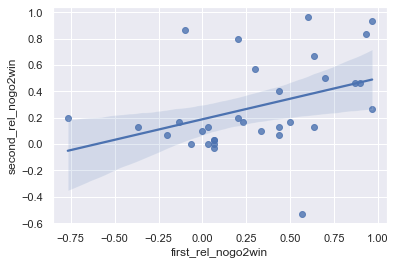

In [22]:
sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win)

In [26]:
test_res = stats.pearsonr(all_performance.first_nogo2win, all_performance.second_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.42967617457281104
p-value:  0.014115533927463723


<AxesSubplot:xlabel='first_nogo2win', ylabel='second_nogo2win'>

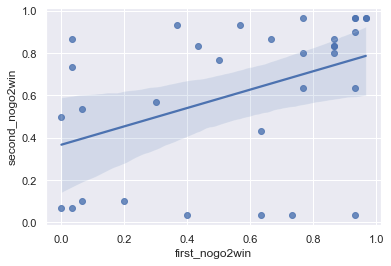

In [23]:
sns.regplot(x = all_performance.first_nogo2win, y = all_performance.second_nogo2win)

# No Go to Avoid Punishment Conditions

In [30]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2avoidPun, all_performance.second_rel_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  -0.023508115873699942
p-value:  0.898379574891061


<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

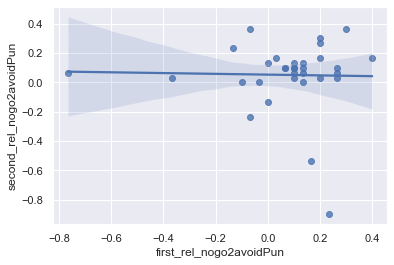

In [33]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

In [34]:
test_res = stats.pearsonr(all_performance.first_nogo2avoidPun, all_performance.second_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.5867183202414702
p-value:  0.0004164406721356581


<AxesSubplot:xlabel='first_nogo2avoidPun', ylabel='second_nogo2avoidPun'>

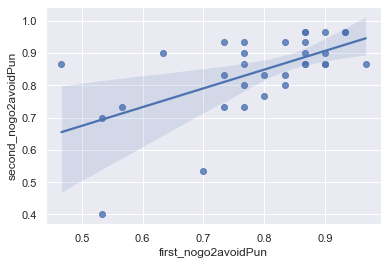

In [35]:
sns.regplot(x = all_performance.first_nogo2avoidPun, y = all_performance.second_nogo2avoidPun)